In [1]:
import os
import sys

sys.path.append("../")

import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt, patches
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
def load_pkl_file(filename):
    """
    Loads a pickle file into a list. The pickle file can contain more than one pickle object
    :param filename: str
    :return: list of python objects
    """
    data = []
    with open(filename, 'rb') as fr:
        try:
            while True:
                data.append(pickle.load(fr))
        except:
            try:
                while True:
                    data.append(joblib.load(fr))
            except EOFError:
                pass
    return data

def get_num_params(n_qubits):
    if n_qubits == 3:
        return 12
    elif n_qubits == 5:
        return 12
    elif n_qubits == 7:
        return 23
    elif n_qubits == 9:
        return 36
    elif n_qubits == 10:
        return 47
    elif n_qubits == 11:
        return 53
    elif n_qubits == 13:
        return 74
    elif n_qubits == 15:
        return 99
    elif n_qubits == 16:
        return 115
    elif n_qubits == 17:
        return 124
    elif n_qubits == 19:
        return 153
    elif n_qubits == 21:
        return 186
    elif n_qubits == 22:
        return 211
    elif n_qubits == 23:
        return 223
    elif n_qubits == 25:
        return 264
    elif n_qubits == 26:
        return 295
    elif n_qubits == 27:
        return 309
    elif n_qubits == 29:
        return 358
    
def get_final_data(data_x, data_y):
    df = pd.DataFrame({'x':data_x, 'y':data_y})
    final_data = {}
    for n in np.unique(data_x):
        final_data[n] = {}
        dfn = df[df.x==n]
        Q1 = dfn.y.quantile(0.25)
        Q3 = dfn.y.quantile(0.75)
        IQR = Q3 - Q1
        outliers_down = dfn[dfn.y < Q1 - 1.5*IQR]
        outliers_up = dfn[dfn.y > Q3 + 1.5*IQR]
        final_data[n]['outliers_up'] = list(outliers_up.y)
        final_data[n]['outliers_down'] = list(outliers_down.y)
        final_data[n]['no_outliers'] = dfn[(dfn.y <= Q3 + 1.5*IQR) & (dfn.y >= Q1 - 1.5*IQR)].y
        final_data[n]['Q1'] = Q1
        final_data[n]['Q3'] = Q3
        final_data[n]['IQR'] = IQR
        final_data[n]['median'] = np.median(dfn.y)
        final_data[n]['mean'] = np.mean(dfn.y)
        final_data[n]['lower_whisker'] = max(min(dfn.y), final_data[n]['Q1'] - 1.5*final_data[n]['IQR'])
        final_data[n]['upper_whisker'] = min(max(dfn.y), final_data[n]['Q3'] + 1.5*final_data[n]['IQR'])
    return final_data, df

def get_final_info_from_data(data, min_n=0):
    data_x = []
    data_y = []

    for n in data:
        if n < min_n:
            continue
        data_x.extend([n for i in range(len(data[n]))])
        data_y.extend(np.abs(data[n]))
    return get_final_data(data_x, np.log10(data_y))

# Data

## MaxCut

In [3]:
EXP_FOLDER_maxcut = '../gradients/maxcut/'

exact_grads_5_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_5.npy')
exact_grads_7_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_7.npy')
exact_grads_9_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_9.npy')
exact_grads_11_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_11.npy')
exact_grads_13_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_13.npy')
exact_grads_15_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_15.npy')
exact_grads_17_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_17.npy')
exact_grads_19_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_19.npy')
exact_grads_21_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_21.npy')
exact_grads_23_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_23.npy')
exact_grads_25_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_25.npy')

data_maxcut_fvqe = {
    5: exact_grads_5_maxcut,#.flatten(),
    7: exact_grads_7_maxcut,#.flatten(),
    9: exact_grads_9_maxcut,#.flatten(),
    11: exact_grads_11_maxcut,#.flatten(),
    13: exact_grads_13_maxcut,#.flatten(),
    15: exact_grads_15_maxcut,#.flatten(),
    17: exact_grads_17_maxcut,#.flatten(),
    19: exact_grads_19_maxcut,#.flatten(),
    21: exact_grads_21_maxcut,#.flatten(),
    23: exact_grads_23_maxcut,#.flatten(),
    25: exact_grads_25_maxcut,#.flatten(),
}

exact_grads_5_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_vqe_5.npy')
exact_grads_7_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_vqe_7.npy')
exact_grads_9_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_vqe_9.npy')
exact_grads_11_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_vqe_11.npy')
exact_grads_13_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_vqe_13.npy')
exact_grads_15_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_vqe_15.npy')
exact_grads_17_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_vqe_17.npy')
exact_grads_19_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_vqe_19.npy')
exact_grads_21_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_vqe_21.npy')
exact_grads_23_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_vqe_23.npy')
exact_grads_25_maxcut = np.load(EXP_FOLDER_maxcut + 'exact_grads_vqe_25.npy')

data_maxcut_vqe = {
    5: exact_grads_5_maxcut,#.flatten(),
    7: exact_grads_7_maxcut,#.flatten(),
    9: exact_grads_9_maxcut,#.flatten(),
    11: exact_grads_11_maxcut,#.flatten(),
    13: exact_grads_13_maxcut,#.flatten(),
    15: exact_grads_15_maxcut,#.flatten(),
    17: exact_grads_17_maxcut,#.flatten(),
    19: exact_grads_19_maxcut,#.flatten(),
    21: exact_grads_21_maxcut,#.flatten(),
    23: exact_grads_23_maxcut,#.flatten(),
    25: exact_grads_25_maxcut,#.flatten(),
}



## ATSP

In [4]:
EXP_FOLDER_atsp = '../gradients/atsp/'
exact_grads_5_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_5.npy')
exact_grads_7_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_7.npy')
exact_grads_10_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_10.npy')
exact_grads_13_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_13.npy')
exact_grads_16_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_16.npy')
exact_grads_19_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_19.npy')
exact_grads_22_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_22.npy')
# exact_grads_26_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_26.npy')

data_atsp_fvqe = {
    5: exact_grads_5_atsp.flatten(),
    7: exact_grads_7_atsp.flatten(),
    10: exact_grads_10_atsp.flatten(),
    13: exact_grads_13_atsp.flatten(),
    16: exact_grads_16_atsp.flatten(),
    19: exact_grads_19_atsp.flatten(),
    22: exact_grads_22_atsp.flatten(),
#     26: exact_grads_26_atsp.flatten(),
}

for n in data_atsp_fvqe:
    data_atsp_fvqe[n] = np.ma.array(data_atsp_fvqe[n], mask=np.isnan(data_atsp_fvqe[n]))

exact_grads_5_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_vqe_5.npy')
exact_grads_7_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_vqe_7.npy')
exact_grads_10_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_vqe_10.npy')
exact_grads_13_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_vqe_13.npy')
exact_grads_16_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_vqe_16.npy')
exact_grads_19_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_vqe_19.npy')
exact_grads_22_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_vqe_22.npy')
# exact_grads_26_atsp = np.load(EXP_FOLDER_atsp + 'exact_grads_26.npy')

data_atsp_vqe = {
    5: exact_grads_5_atsp.flatten(),
    7: exact_grads_7_atsp.flatten(),
    10: exact_grads_10_atsp.flatten(),
    13: exact_grads_13_atsp.flatten(),
    16: exact_grads_16_atsp.flatten(),
    19: exact_grads_19_atsp.flatten(),
    22: exact_grads_22_atsp.flatten(),
#     26: exact_grads_26_atsp.flatten(),
}

for n in data_atsp_vqe:
    data_atsp_vqe[n] = np.ma.array(data_atsp_vqe[n], mask=np.isnan(data_atsp_vqe[n]))

In [17]:
data_maxcut_fvqe_aux = {n: np.log10(np.abs((data_maxcut_fvqe[n]))) for n in data_maxcut_fvqe}
data_maxcut_vqe_aux = {n: np.log10(np.abs((data_maxcut_vqe[n]))) for n in data_maxcut_vqe}

data_atsp_fvqe_aux = {n: np.log10(np.abs((data_atsp_fvqe[n]))) for n in data_atsp_fvqe}
data_atsp_vqe_aux = {n: np.log10(np.abs((data_atsp_vqe[n]))) for n in data_atsp_vqe}

In [18]:
ns_maxcut = list(data_maxcut_fvqe_aux.keys())
ns_atsp = list(data_atsp_fvqe_aux.keys())

str_fit = lambda reg, r2: r'{:.2e}'.format(np.power(10, reg.intercept_ )) + r'$\cdot 10^{s1}$'.replace('s1', '{:.3f}N'.format(np.round(reg.coef_, 3)[0])) + r' ($R^2$ = {:.3f})'.format(r2)
str_fit_log = lambda reg, r2: r'{:.2e}'.format(np.power(10, reg.intercept_ )) + r'$\cdot N^{s1}$'.replace('s1', '{:.3f}'.format(np.round(reg.coef_, 3)[0])) + r' ($R^2$ = {:.3f})'.format(r2)

## Fits

In [19]:
def get_fit(x, y):
    reg = LinearRegression().fit(x.reshape((-1, 1)), y)
    print('{} + {} * n'.format(reg.intercept_, reg.coef_))
    y_pred = reg.predict(x.reshape((-1, 1)))
    r2 =  r2_score(y, y_pred)
    print('R2: ', r2)
    return reg, r2

def get_best_fit(x, data):
    best_reg_max = None
    best_r2_max = 0
    best_ns_max = []

    best_reg_max_log = None
    best_r2_max_log = 0
    best_ns_max_log = []

    for i in range(len(x)): 
        ns = x[i:]
        if len(ns) < 5:
            continue
        reg_log, r2_log = get_fit(np.log10(ns), 
            np.array([np.median(data[n]) for n in ns]))
        reg, r2 = get_fit(np.array(ns), 
            np.array([np.median(data[n]) for n in ns]))

        if r2 + r2_log > best_r2_max + best_r2_max_log:
            best_r2_max = r2
            best_reg_max = reg
            best_ns_max = ns 

            best_r2_max_log = r2_log
            best_reg_max_log = reg_log
            best_ns_max_log = ns 
            
    return best_reg_max, best_r2_max, best_ns_max, best_reg_max_log, best_r2_max_log, best_ns_max_log

In [20]:
reg_max_fvqe, r2_max_fvqe, ns_maxcut_fvqe, reg_max_pol_fvqe, r2_max_pol_fvqe, ns_maxcut_pol_fvqe = get_best_fit(ns_maxcut, data_maxcut_fvqe_aux)
reg_max_vqe, r2_max_vqe, ns_maxcut_vqe, reg_max_pol_vqe, r2_max_pol_vqe, ns_maxcut_pol_vqe = get_best_fit(ns_maxcut, data_maxcut_vqe_aux)

6.519080563479919 + [-3.29514379] * n
R2:  0.9876641672913654
4.42556168620852 + [-0.10848306] * n
R2:  0.9369232131980079
6.35101495903794 + [-3.15910264] * n
R2:  0.9820708007426181
4.160366943177085 + [-0.09452544] * n
R2:  0.9699160811690754
6.686008981177549 + [-3.42420398] * n
R2:  0.9894116921778224
4.118516289370744 + [-0.09239744] * n
R2:  0.9590572513341187
6.713330277438688 + [-3.44542767] * n
R2:  0.9826787206054118
3.9839124894045232 + [-0.08577758] * n
R2:  0.9515563025308478
6.4316350234485 + [-3.23004587] * n
R2:  0.9765259909050954
3.767969080402077 + [-0.07549457] * n
R2:  0.9588404170406686
6.073058901546555 + [-2.95967552] * n
R2:  0.9677537092115247
3.554664002064777 + [-0.06564972] * n
R2:  0.9700659065798651
6.299357022234581 + [-3.12819255] * n
R2:  0.9500705854779344
3.549597548023594 + [-0.06542286] * n
R2:  0.9484532411283517
-0.6442994182589612 + [-1.18148837] * n
R2:  0.9820171041285505
-1.406479820874523 + [-0.03812775] * n
R2:  0.8950804997407366
-0.75773

In [21]:
reg_atsp_fvqe, r2_atsp_fvqe, ns_atsp_fvqe, reg_atsp_pol_fvqe, r2_atsp_pol_fvqe, ns_atsp_pol_fvqe = get_best_fit(ns_atsp, data_atsp_fvqe_aux)
reg_atsp_vqe, r2_atsp_vqe, ns_atsp_vqe, reg_atsp_pol_vqe, r2_atsp_pol_vqe, ns_atsp_pol_vqe = get_best_fit(ns_atsp, data_atsp_vqe_aux)

c:\Users\Gabriel.Marin\OneDrive - Quantinuum\fvqe-data\.venv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


1.4811928885601384 + [-0.78230073] * n
R2:  0.6350742168754773


c:\Users\Gabriel.Marin\OneDrive - Quantinuum\fvqe-data\.venv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


1.0776848828700425 + [-0.03293088] * n
R2:  0.7988357339778624


c:\Users\Gabriel.Marin\OneDrive - Quantinuum\fvqe-data\.venv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


1.9166552644653252 + [-1.14616867] * n
R2:  0.7639263856316908


c:\Users\Gabriel.Marin\OneDrive - Quantinuum\fvqe-data\.venv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


1.205567016975309 + [-0.04033869] * n
R2:  0.8711806099577752


c:\Users\Gabriel.Marin\OneDrive - Quantinuum\fvqe-data\.venv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


2.4484962457064707 + [-1.57836849] * n
R2:  0.8000238749624684


c:\Users\Gabriel.Marin\OneDrive - Quantinuum\fvqe-data\.venv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


1.326945404470093 + [-0.04708193] * n
R2:  0.8755882775653397


c:\Users\Gabriel.Marin\OneDrive - Quantinuum\fvqe-data\.venv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


-0.3922231018829492 + [-1.58439914] * n
R2:  0.9936508241500661


c:\Users\Gabriel.Marin\OneDrive - Quantinuum\fvqe-data\.venv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


-1.3092076807271584 + [-0.05910494] * n
R2:  0.9815804520644288


c:\Users\Gabriel.Marin\OneDrive - Quantinuum\fvqe-data\.venv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


-0.3385331314729376 + [-1.62926194] * n
R2:  0.9899846473286553


c:\Users\Gabriel.Marin\OneDrive - Quantinuum\fvqe-data\.venv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


-1.4000962807001693 + [-0.05384005] * n
R2:  0.9953315181957803


c:\Users\Gabriel.Marin\OneDrive - Quantinuum\fvqe-data\.venv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


-0.15824813585089004 + [-1.77577028] * n
R2:  0.9920479343744043


c:\Users\Gabriel.Marin\OneDrive - Quantinuum\fvqe-data\.venv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


-1.454601397628725 + [-0.05081199] * n
R2:  0.9990717979237781


# Plot

In [15]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIX"
mpl.rcParams["mathtext.fontset"] = "stix"

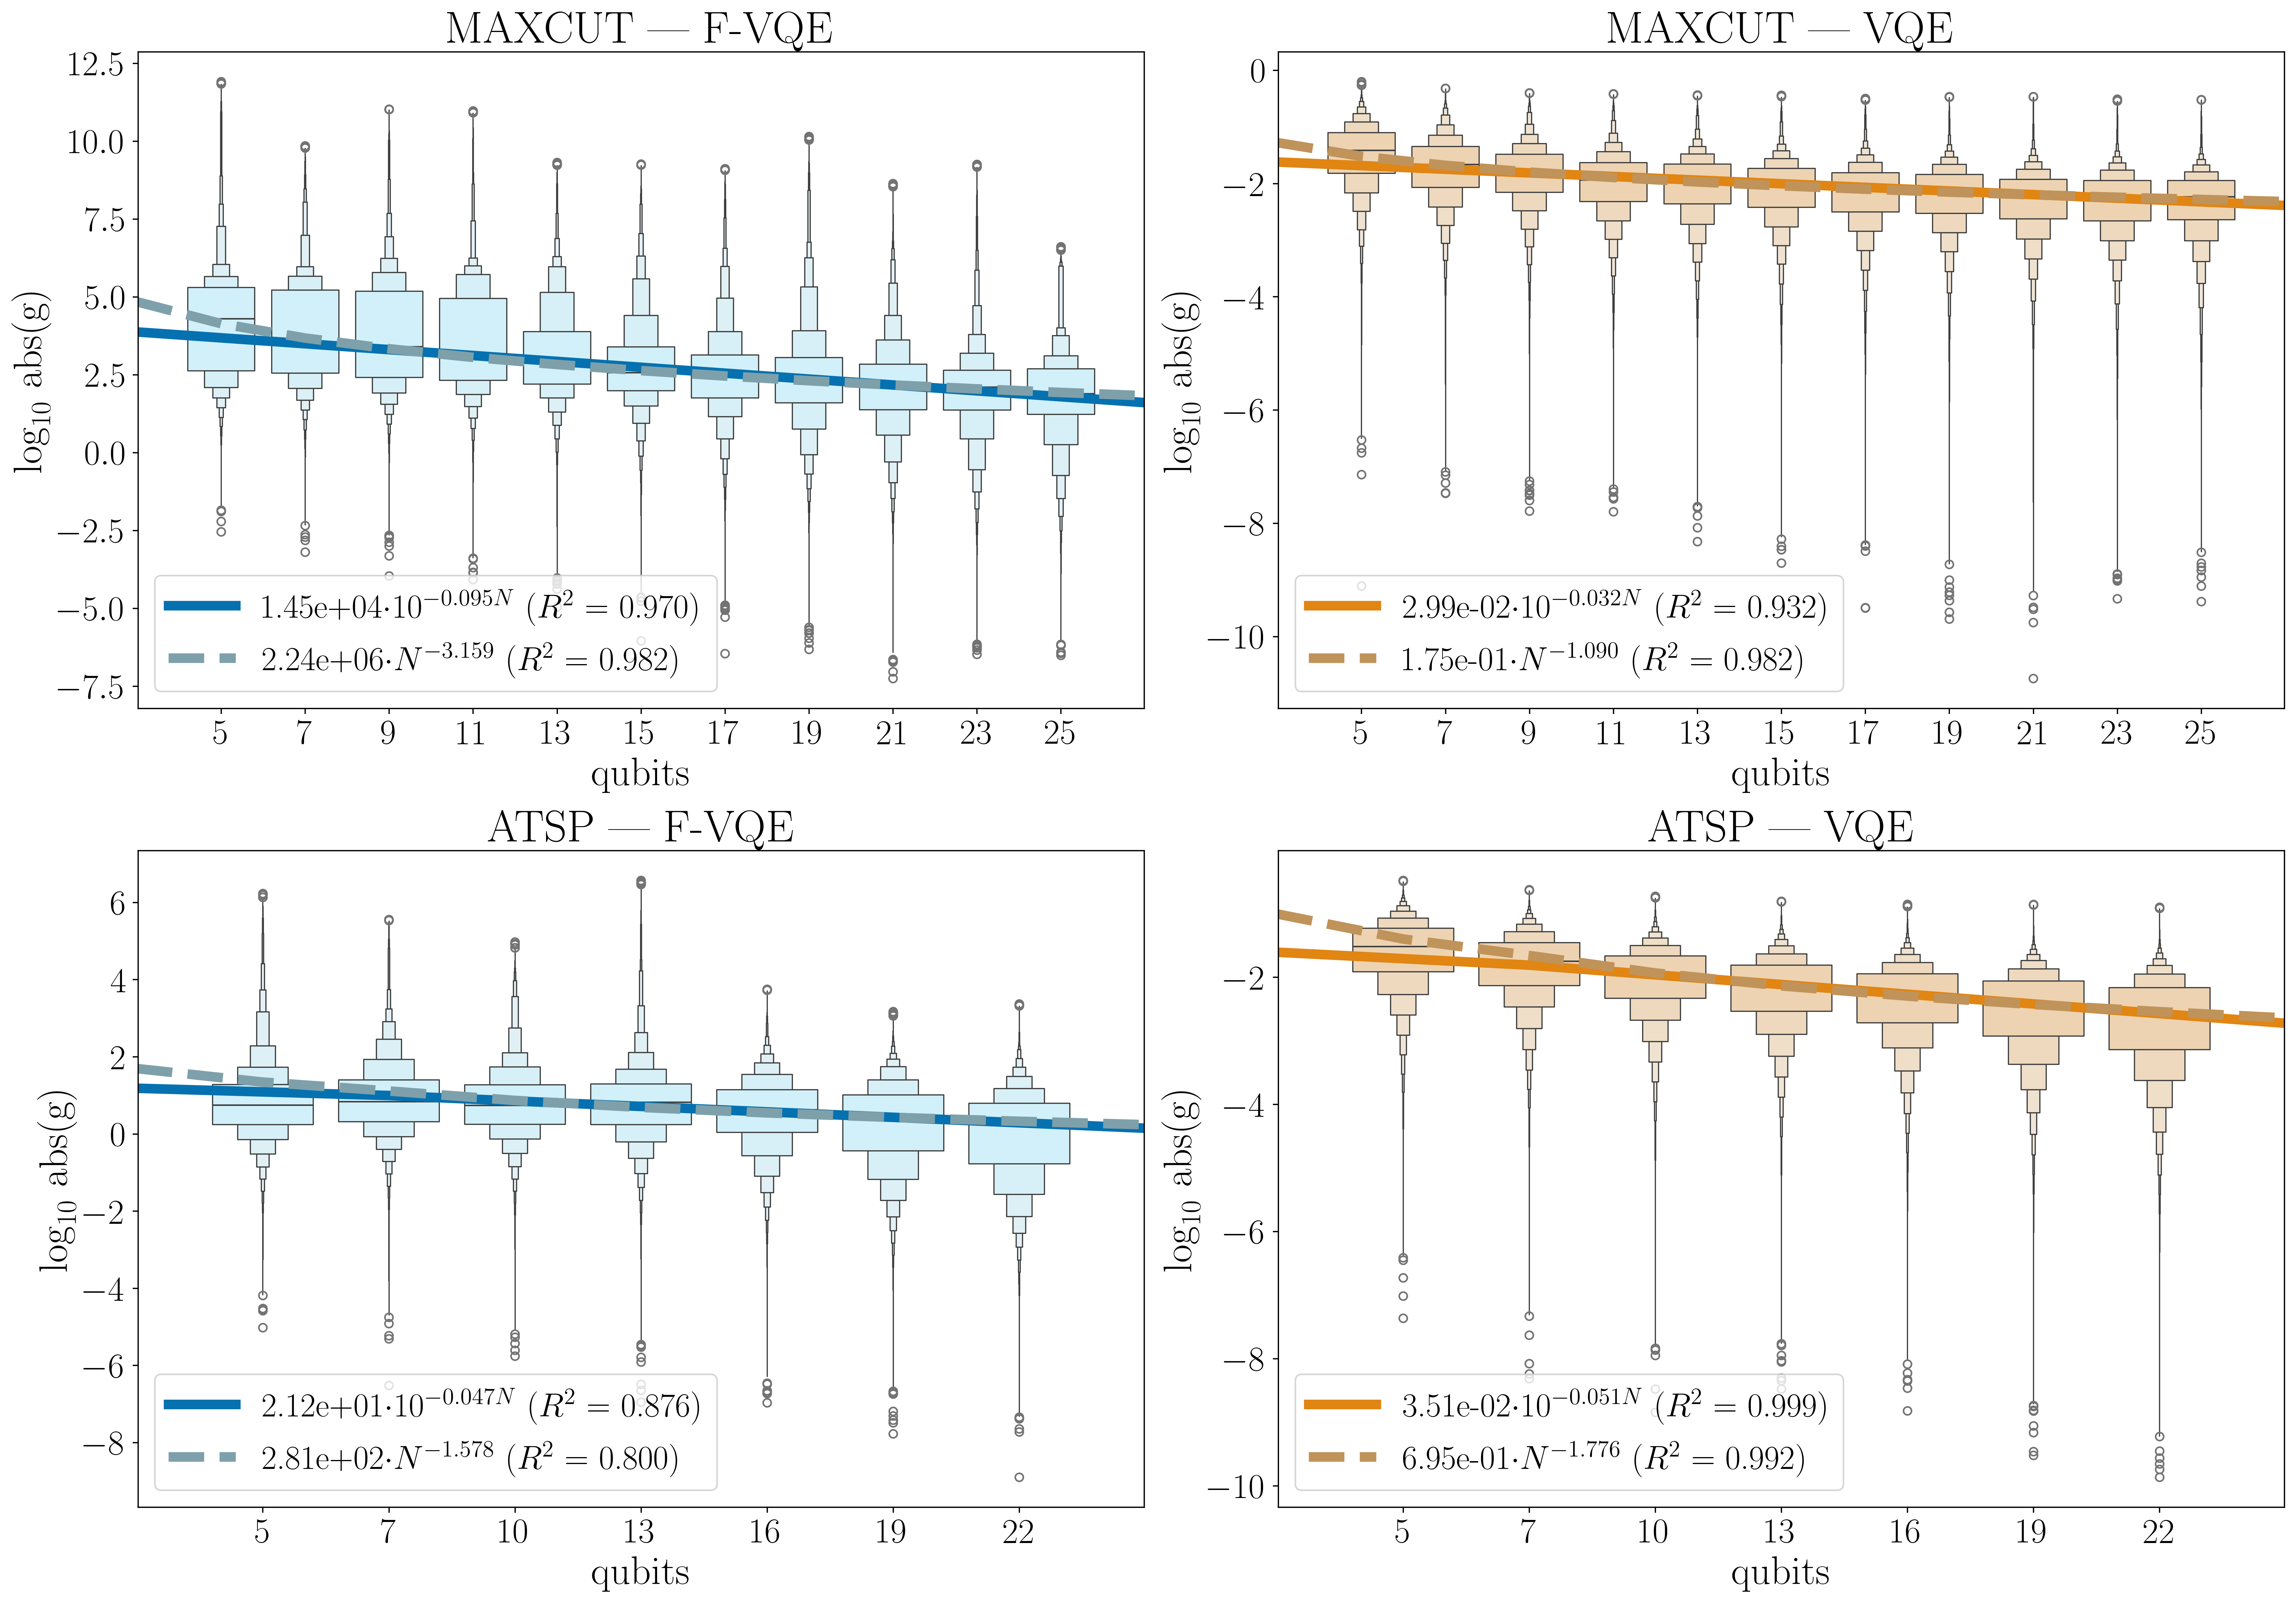

In [23]:
colors = {
        'fvqe': '#0571b0',
        'vqe':  '#e18513' ,
    }
colors2 = {
        'fvqe': '#cbf3ff',
        'vqe':  '#f7d4a8' ,
    }
colors3 = {
        'fvqe': '#7ea0aa',
        'vqe':  '#c0935a' ,
    }
figure, axs = plt.subplots(2, 2, figsize=(20,14), dpi=400)
sns.boxenplot({3:[None]}, color=colors2['fvqe'], ax=axs[0, 0])
sns.boxenplot({3:[None]}, color=colors2['fvqe'], ax=axs[0, 1])
sns.boxenplot({3:[None]}, color=colors2['fvqe'], ax=axs[1, 0])
sns.boxenplot({3:[None]}, color=colors2['fvqe'], ax=axs[1, 1])

for n in data_maxcut_fvqe_aux:
    aux = {n: data_maxcut_fvqe_aux[n]}
    sns.boxenplot(aux, color=colors2['fvqe'], ax=axs[0, 0])
    aux = {n: data_maxcut_vqe_aux[n]}
    sns.boxenplot(aux, color=colors2['vqe'], ax=axs[0, 1])
for n in data_atsp_fvqe_aux:
    aux = {n: data_atsp_fvqe_aux[n]}
    sns.boxenplot(aux, color=colors2['fvqe'], ax=axs[1, 0])
    aux = {n: data_atsp_vqe_aux[n]}
    sns.boxenplot(aux, color=colors2['vqe'], ax=axs[1, 1])
sns.boxenplot({27:[None]}, color=colors2['fvqe'], ax=axs[0, 0])
sns.boxenplot({27:[None]}, color=colors2['fvqe'], ax=axs[0, 1])
sns.boxenplot({25:[None]}, color=colors2['fvqe'], ax=axs[1, 0])
sns.boxenplot({25:[None]}, color=colors2['fvqe'], ax=axs[1, 1])

ns_extrapol = [3] + ns_maxcut + [27]
axs[0, 0].plot([reg_max_fvqe.intercept_ + reg_max_fvqe.coef_ * n for n in ns_extrapol], '-', color=colors['fvqe'], 
    linewidth=6, label=str_fit(reg_max_fvqe, r2_max_fvqe))
axs[0, 0].plot([reg_max_pol_fvqe.intercept_ + reg_max_pol_fvqe.coef_ * np.log10(n) for n in ns_extrapol], '--', color=colors3['fvqe'], 
    linewidth=6, label=str_fit_log(reg_max_pol_fvqe, r2_max_pol_fvqe))

axs[0, 1].plot([reg_max_vqe.intercept_ + reg_max_vqe.coef_ * n for n in ns_extrapol], '-', color=colors['vqe'], 
    linewidth=6, label=str_fit(reg_max_vqe, r2_max_vqe))
axs[0, 1].plot([reg_max_pol_vqe.intercept_ + reg_max_pol_vqe.coef_ * np.log10(n) for n in ns_extrapol], '--', color=colors3['vqe'], 
    linewidth=6, label=str_fit_log(reg_max_pol_vqe, r2_max_pol_vqe))

ns_extrapol = [3] + ns_atsp + [25]
axs[1, 0].plot([reg_atsp_fvqe.intercept_ + reg_atsp_fvqe.coef_ * n for n in ns_extrapol], '-', color=colors['fvqe'], 
    linewidth=6, label=str_fit(reg_atsp_fvqe, r2_atsp_fvqe))
axs[1, 0].plot([reg_atsp_pol_fvqe.intercept_ + reg_atsp_pol_fvqe.coef_ * np.log10(n) for n in ns_extrapol], '--', color=colors3['fvqe'],
     linewidth=6, label=str_fit_log(reg_atsp_pol_fvqe, r2_atsp_pol_fvqe))

axs[1, 1].plot([reg_atsp_vqe.intercept_ + reg_atsp_vqe.coef_ * n for n in ns_extrapol], '-', color=colors['vqe'], 
    linewidth=6, label=str_fit(reg_atsp_vqe, r2_atsp_vqe))
axs[1, 1].plot([reg_atsp_pol_vqe.intercept_ + reg_atsp_pol_vqe.coef_ * np.log10(n) for n in ns_extrapol], '--', color=colors3['vqe'], 
    linewidth=6, label=str_fit_log(reg_atsp_pol_vqe, r2_atsp_pol_vqe))
for i in [0, 1]:
    for j in [0, 1]: 
        axs[i, j].tick_params(labelsize=22, which='major')
        axs[i, j].tick_params(labelsize=20, which='minor')
        axs[i, j].legend(fontsize=21, loc='lower left')

axs[0,0].set_title(r'MAXCUT | F-VQE', fontsize=28)
axs[0,1].set_title(r'MAXCUT | VQE', fontsize=28)
axs[1,0].set_title(r'ATSP | F-VQE', fontsize=28)
axs[1,1].set_title(r'ATSP | VQE', fontsize=28)

axs[0,0].set_xlabel('qubits', fontsize=25)
axs[1,0].set_xlabel('qubits', fontsize=25)
axs[0,1].set_xlabel('qubits', fontsize=25)
axs[1,1].set_xlabel('qubits', fontsize=25)

axs[0,0].set_ylabel(r'$\log_{10}$ abs(g)', fontsize=25)
axs[1,0].set_ylabel(r'$\log_{10}$ abs(g)', fontsize=25)

axs[0,1].set_ylabel(r'$\log_{10}$ abs(g)', fontsize=25)
axs[1,1].set_ylabel(r'$\log_{10}$ abs(g)', fontsize=25)


# axs[0, 0].set_ylim(bottom=-11)
# axs[0, 1].set_ylim(bottom=-11)
# axs[1, 0].set_ylim(bottom=-11)

axs[0, 0].set_xlim(0.01, 11.99)
axs[0, 1].set_xlim(0.01, 11.99)
axs[1, 0].set_xlim(0.01, 7.99)
axs[1, 1].set_xlim(0.01, 7.99)
figure.tight_layout()
# plt.savefig('grads_final_abs.pdf', bbox_inches='tight', format='pdf')
